<a href="https://colab.research.google.com/github/hajeog/Seminar_class/blob/main/6%EC%9E%A5_%EC%BB%A8%EB%B6%88%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 10s - loss: 0.2984 - accuracy: 0.9126 - val_loss: 0.0828 - val_accuracy: 0.9754 - 10s/epoch - 22ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.0636 - val_accuracy: 0.9794 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0498 - val_accuracy: 0.9833 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0393 - val_accuracy: 0.9872 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0367 - val_accuracy: 0.9882 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0347 - val_accuracy: 0.9872 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0439 - val_accuracy: 0.9860 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0326 -

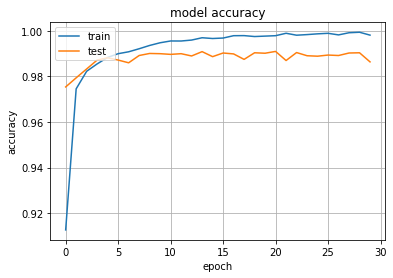

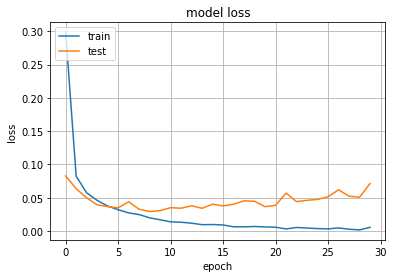

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_test,y_test),verbose=2)

# 신경망 학습
res = cnn.evaluate(x_test,y_test,verbose=0)
print('정확도 : ',res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

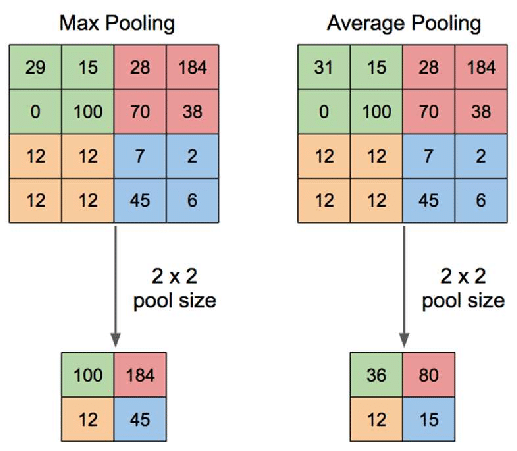

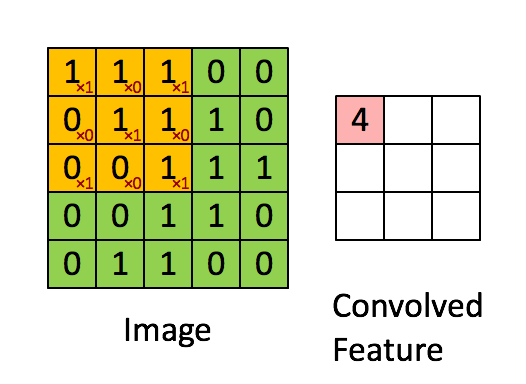

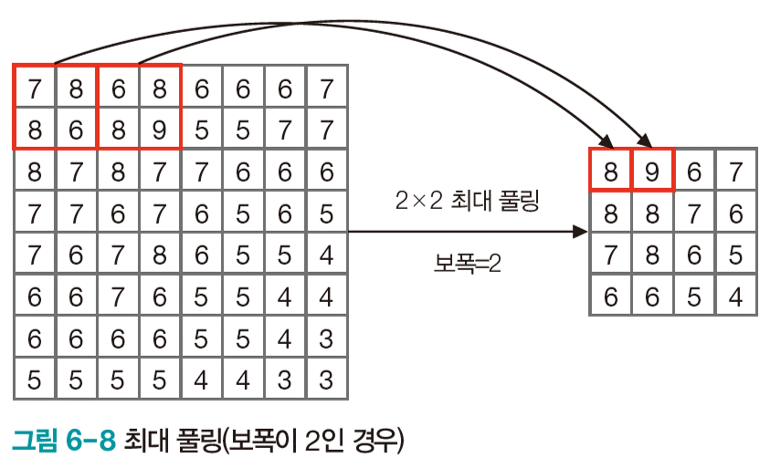

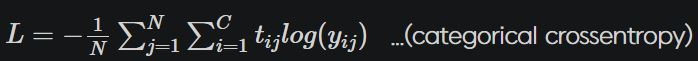

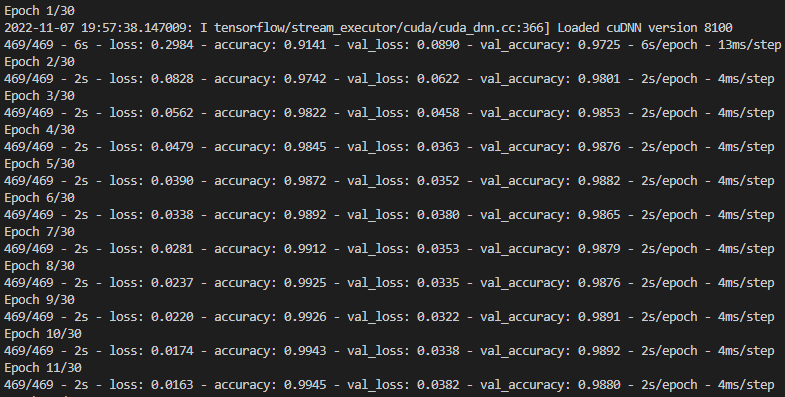

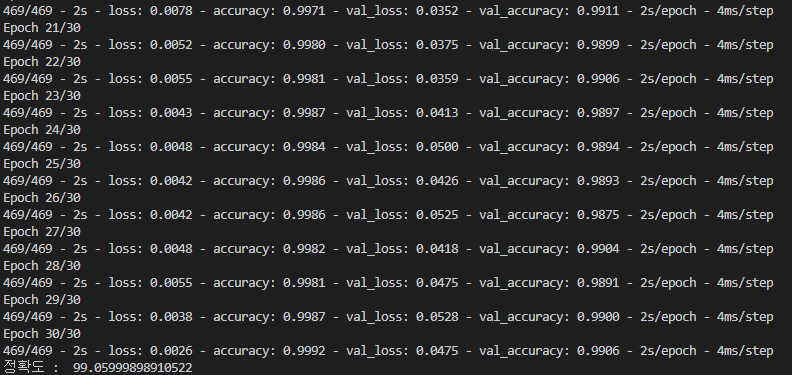

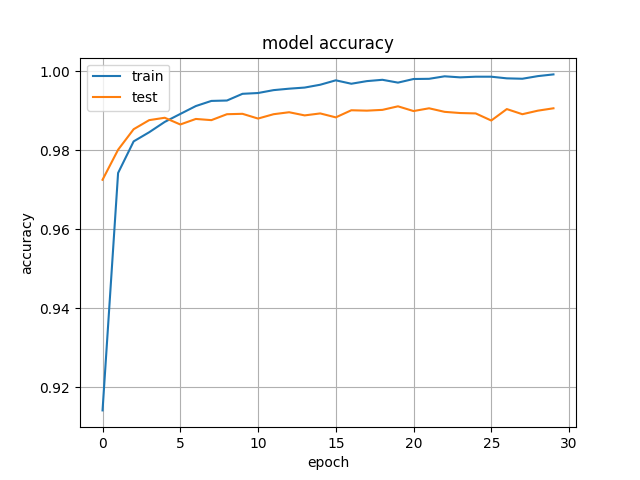

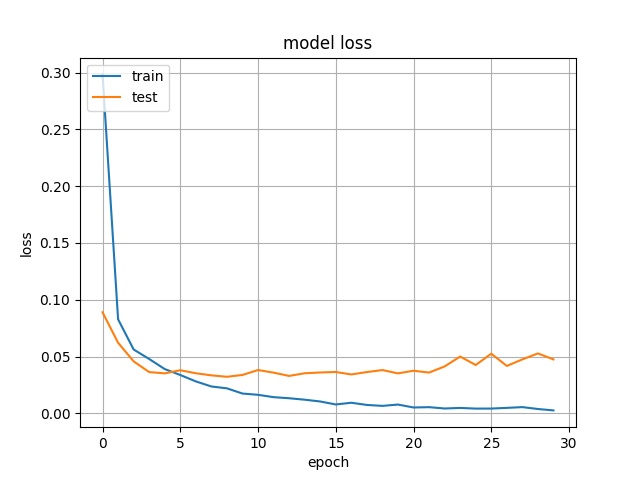